<h3>20156042 Kim GaYoung</h3>

K-means algorithm on color image

1. Select any color image that consists of distinctive regions with different colors.

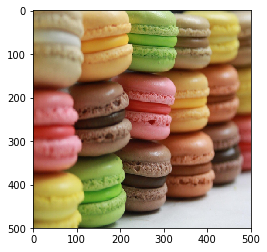

In [5]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np
import random
 
# Read image
im = pilimg.open('macaroon.jpg')

#resize image
im2 = im.resize((500,500))

im2.save('macaroon2.jpg')
 
# Fetch image pixel data to numpy array
pix = np.array(im2)
plt.imshow(pix)

In [6]:
print(len(pix), len(pix[0,:]), len(pix[0,0,:]))  #confirm size

500 500 3


In [7]:
size_row	= len(pix[0,:])    # height of the image
size_col  	= len(pix)
table_label  = np.zeros((size_row , size_col), dtype='int')

def initial(centeroids,k):
    for i in range(k):
        for j in range(3):
            centeroids[i,j] = random.randrange(0,255)

In [8]:
#find min distance
def min_dst(temp,k,x,y):
    min = temp[0]
    table_label[x,y] = 0
    for i in range(k):
        if temp[i] < min:
            min = temp[i]
            table_label[x,y] = i  #centroid of x-th data is i
    return min

In [9]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

In [10]:
import matplotlib.pyplot as plt
def Image(centeroids):
    plt.title('Output image for each $K$')
    for i in range(size_row):
        for j in range(size_col):
            pix[i,j,:] = centeroids[table_label[i,j],:]
    plt.imshow(pix)

In [11]:
def Energy(energy):
    plt.title('Energy curve for each $K$')
    plt.plot(energy,'ro-')
    plt.show()

In [12]:
def k_means(k):
    temp = np.zeros(k,dtype = 'float')
    
    centeroids = np.zeros((k,3),dtype = 'int')
    pre_centeroids = np.zeros((k,3),dtype = 'int')
    energy = []
    pix = np.array(im2)
    
    iteration = 0
    dst = np.zeros((size_row,size_col),dtype = 'float')
    
    initial(centeroids,k)
    
    while(not(np.array_equal(centeroids,pre_centeroids))):
        avg = np.zeros((k,3),dtype='int')
        cnt = np.zeros(k,dtype='int')   # avg / cnt
        
        pre_centeroids = centeroids
        iteration += 1
        
        #calculate each pixel and centeroid ' s distance(group) 
        for i in range(size_row):
            for j in range(size_col):
                for m in range(k):
                    temp[m] = distance(pix[i,j,:],centeroids[m,:])
                dst[i,j] = min_dst(temp,k,i,j)
        
            
        #change centeroids
        for i in range(size_row):
            for j in range(size_col):
                avg[table_label[i,j],:] += pix[i,j,:]
                cnt[table_label[i,j]] += 1
                
        for i in range(k):
            if cnt[i] != 0:
                avg[i,:] = avg[i,:]/cnt[i]
        
        centeroids = avg
        energy.append(np.sum(dst))
        
    Energy(energy)
    Image(centeroids)
    print(iteration)

2. Apply K-means algorithm to the given image with at least 4 different choice of $K$.
3. For each $K$, plot the energy curve and the result image.

K=2

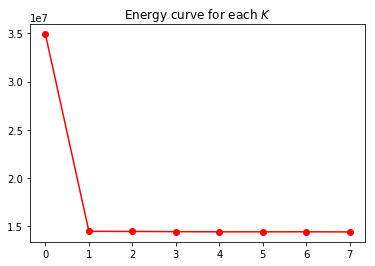

8


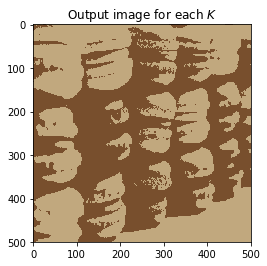

In [19]:
k_means(2)

K=5

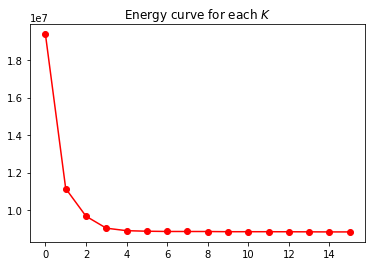

16


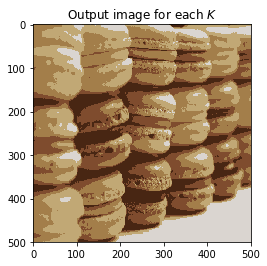

In [10]:
k_means(5)

K=10

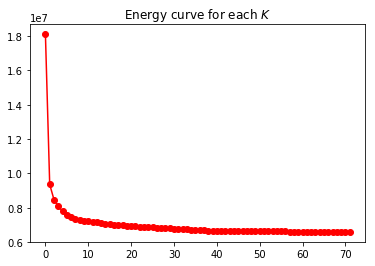

72


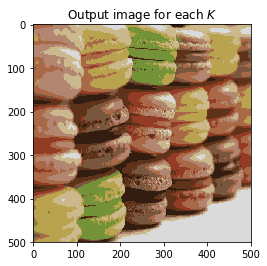

In [13]:
k_means(10)

K=15

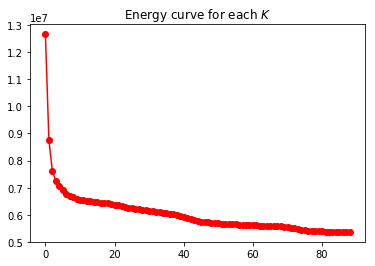

89


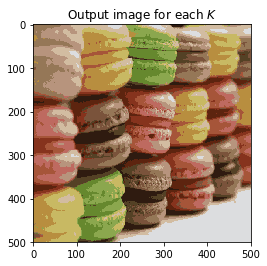

In [20]:
k_means(15)